In [1]:
import pandas as pd
import numpy as np

from imblearn.under_sampling import RandomUnderSampler

from utils import *
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

DATA_FOLDER = '../data/Santander Customer Transaction Prediction Dataset/'
RANDOM_STATE = 8

In [2]:
train = pd.read_csv(DATA_FOLDER + 'train.csv')

In [3]:
train.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28
0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306
1,train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464
2,train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463
3,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070
4,train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID_code  200000 non-null  object 
 1   var_0    200000 non-null  float64
 2   var_1    200000 non-null  float64
 3   var_2    200000 non-null  float64
 4   var_3    200000 non-null  float64
 5   var_4    200000 non-null  float64
 6   var_5    200000 non-null  float64
 7   var_6    200000 non-null  float64
 8   var_7    200000 non-null  float64
 9   var_8    200000 non-null  float64
 10  var_9    200000 non-null  float64
 11  var_10   200000 non-null  float64
 12  var_11   200000 non-null  float64
 13  var_12   200000 non-null  float64
 14  var_13   200000 non-null  float64
 15  var_14   200000 non-null  float64
 16  var_15   200000 non-null  float64
 17  var_16   200000 non-null  float64
 18  var_17   200000 non-null  float64
 19  var_18   200000 non-null  float64
 20  var_19   200000 non-null  

In [5]:
train.isna().mean().mean()

0.0

In [6]:
data, identifiers, df_pca = pca_data(train, 'ID_code', 20, True)

PCA Result -  0.6942020507499117
Outlier is point if it is outlier in 1.0 Features


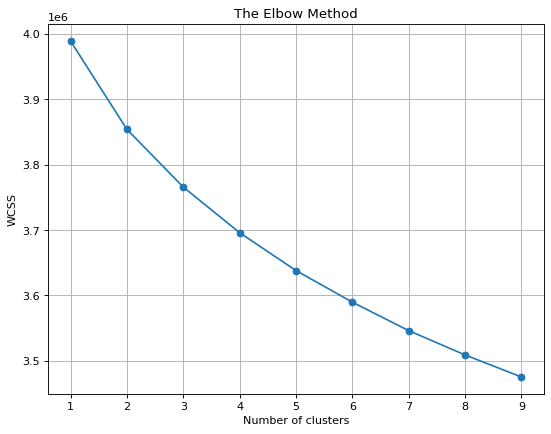

In [7]:
diff_clusters = cluster_in_range(df_pca, identifiers, range(1, 10))

In [8]:
from classes.ClusterDescriptionsNew import ClusterDescriptionsNew

cluster_desc_new = ClusterDescriptionsNew(data, df_pca, identifiers, range(2, 10), 'santander_transaction')

cluster_desc_new.describe_clusters()

<-- Results for 2 clusters -->
Train F1-score: Weighted 0.5645, Macro 0.5643
Train ROC AUC: Weighted 0.7144, Macro 0.7144
Test F1-score: Weighted 0.5626, Macro 0.5623
Test ROC AUC: Weighted 0.7111, Macro 0.7111

<-- Results for 3 clusters -->
Train F1-score: Weighted 0.6137, Macro 0.6099
Train ROC AUC: Weighted 0.8096, Macro 0.8075
Test F1-score: Weighted 0.6150, Macro 0.6108
Test ROC AUC: Weighted 0.8082, Macro 0.8058

<-- Results for 4 clusters -->
Train F1-score: Weighted 0.5159, Macro 0.5145
Train ROC AUC: Weighted 0.7723, Macro 0.7703
Test F1-score: Weighted 0.5162, Macro 0.5148
Test ROC AUC: Weighted 0.7716, Macro 0.7696

<-- Results for 5 clusters -->
Train F1-score: Weighted 0.4327, Macro 0.4325
Train ROC AUC: Weighted 0.7630, Macro 0.7629
Test F1-score: Weighted 0.4286, Macro 0.4288
Test ROC AUC: Weighted 0.7618, Macro 0.7617

<-- Results for 6 clusters -->
Train F1-score: Weighted 0.2467, Macro 0.2513
Train ROC AUC: Weighted 0.7133, Macro 0.7143
Test F1-score: Weighted 0.2468

In [9]:
from classes.MultiClassClusterDescriptions import MultiClassClusterDescriptions

# Initialize the MultiClassClusterDescriptions object
multi_cluster_desc = MultiClassClusterDescriptions(data, df_pca, identifiers, range(2, 10), 'santander_transaction')

# Generate descriptions for all clusters
multi_cluster_desc.describe_clusters()

<-- Results for 2 clusters -->
Train F1-score: Weighted 0.6365, Macro 0.6348
Train ROC AUC: Weighted 0.7144, Macro 0.7144
Test F1-score: Weighted 0.6354, Macro 0.6333
Test ROC AUC: Weighted 0.7111, Macro 0.7111

<-- Results for 3 clusters -->
Train F1-score: Weighted 0.6441, Macro 0.6398
Train ROC AUC: Weighted 0.7889, Macro 0.7858
Test F1-score: Weighted 0.6440, Macro 0.6394
Test ROC AUC: Weighted 0.7904, Macro 0.7871

<-- Results for 4 clusters -->
Train F1-score: Weighted 0.5492, Macro 0.5459
Train ROC AUC: Weighted 0.7658, Macro 0.7642
Test F1-score: Weighted 0.5481, Macro 0.5450
Test ROC AUC: Weighted 0.7649, Macro 0.7634

<-- Results for 5 clusters -->
Train F1-score: Weighted 0.4535, Macro 0.4490
Train ROC AUC: Weighted 0.7403, Macro 0.7386
Test F1-score: Weighted 0.4489, Macro 0.4451
Test ROC AUC: Weighted 0.7378, Macro 0.7364

<-- Results for 6 clusters -->
Train F1-score: Weighted 0.3515, Macro 0.3523
Train ROC AUC: Weighted 0.7024, Macro 0.7025
Test F1-score: Weighted 0.3476

In [10]:
multi_cluster_desc.plot_all_trees()

In [11]:
multi_cluster_desc.descriptions[4]

{0: {'query': 'var_8 <= -1.104800. var_2 <= 12.101950.',
  'train_metrics': {'f1': 0.6936578704261558, 'roc_auc': 0.8395543680920553},
  'test_metrics': {'f1': 0.693673740587122, 'roc_auc': 0.8374001720132617}},
 1: {'query': 'var_8 > -1.104800. var_2 > 12.137050.',
  'train_metrics': {'f1': 0.46457059679767104, 'roc_auc': 0.7356694870961384},
  'test_metrics': {'f1': 0.46855418890693895, 'roc_auc': 0.7344343146133232}},
 2: {'query': 'var_8 > -1.104800. var_2 <= 12.137050. var_9 > 7.520150.',
  'train_metrics': {'f1': 0.5186993760415456, 'roc_auc': 0.7525485379861875},
  'test_metrics': {'f1': 0.5138421733505821, 'roc_auc': 0.7510995213780067}},
 3: {'query': 'var_8 > -1.104800. var_2 <= 12.137050. var_9 <= 7.520150.',
  'train_metrics': {'f1': 0.5064847357177313, 'roc_auc': 0.7291672009951493},
  'test_metrics': {'f1': 0.5039075399009356, 'roc_auc': 0.7307392450094415}}}

# Test Without PCA

In [12]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
scaled_data = s.fit_transform(data)
df_scaled = pd.DataFrame(scaled_data)

In [13]:
# Initialize the MultiClassClusterDescriptions object
multi_cluster_desc_2 = MultiClassClusterDescriptions(data, df_scaled, identifiers, range(2, 10), 'santander_transaction')

# Generate descriptions for all clusters
multi_cluster_desc_2.describe_clusters()

<-- Results for 2 clusters -->
Train F1-score: Weighted 0.9744, Macro 0.9743
Train ROC AUC: Weighted 0.9743, Macro 0.9743
Test F1-score: Weighted 0.9738, Macro 0.9737
Test ROC AUC: Weighted 0.9737, Macro 0.9737

<-- Results for 3 clusters -->
Train F1-score: Weighted 0.8751, Macro 0.8747
Train ROC AUC: Weighted 0.9532, Macro 0.9530
Test F1-score: Weighted 0.8726, Macro 0.8724
Test ROC AUC: Weighted 0.9524, Macro 0.9523

<-- Results for 4 clusters -->
Train F1-score: Weighted 0.8356, Macro 0.8359
Train ROC AUC: Weighted 0.9274, Macro 0.9274
Test F1-score: Weighted 0.8343, Macro 0.8345
Test ROC AUC: Weighted 0.9260, Macro 0.9260

<-- Results for 5 clusters -->
Train F1-score: Weighted 0.6778, Macro 0.6706
Train ROC AUC: Weighted 0.8861, Macro 0.8841
Test F1-score: Weighted 0.6789, Macro 0.6717
Test ROC AUC: Weighted 0.8859, Macro 0.8839

<-- Results for 6 clusters -->
Train F1-score: Weighted 0.5006, Macro 0.4936
Train ROC AUC: Weighted 0.8103, Macro 0.8079
Test F1-score: Weighted 0.4947

In [14]:
# Initialize the MultiClassClusterDescriptions object
cluster_desc_2 = ClusterDescriptionsNew(data, df_scaled, identifiers, range(2, 10), 'santander_transaction')

# Generate descriptions for all clusters
cluster_desc_2.describe_clusters()

<-- Results for 2 clusters -->
Train F1-score: Weighted 0.9744, Macro 0.9743
Train ROC AUC: Weighted 0.9743, Macro 0.9743
Test F1-score: Weighted 0.9738, Macro 0.9737
Test ROC AUC: Weighted 0.9737, Macro 0.9737

<-- Results for 3 clusters -->
Train F1-score: Weighted 0.8890, Macro 0.8888
Train ROC AUC: Weighted 0.9457, Macro 0.9459
Test F1-score: Weighted 0.8862, Macro 0.8861
Test ROC AUC: Weighted 0.9443, Macro 0.9444

<-- Results for 4 clusters -->
Train F1-score: Weighted 0.8172, Macro 0.8182
Train ROC AUC: Weighted 0.9403, Macro 0.9400
Test F1-score: Weighted 0.8123, Macro 0.8132
Test ROC AUC: Weighted 0.9377, Macro 0.9374

<-- Results for 5 clusters -->
Train F1-score: Weighted 0.7485, Macro 0.7453
Train ROC AUC: Weighted 0.8884, Macro 0.8881
Test F1-score: Weighted 0.7463, Macro 0.7432
Test ROC AUC: Weighted 0.8879, Macro 0.8876

<-- Results for 6 clusters -->
Train F1-score: Weighted 0.5380, Macro 0.5329
Train ROC AUC: Weighted 0.8305, Macro 0.8294
Test F1-score: Weighted 0.5320

# Evaluate Test Set

In [15]:
test = pd.read_csv(DATA_FOLDER + 'test.csv')

In [16]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255


In [18]:
indexes = test.pop('ID_code')

In [19]:
scaled_data = s.fit_transform(test)
df_scaled = pd.DataFrame(scaled_data)

In [20]:
multi_cluster_desc_2.evaluate(test, df_scaled, 4)

{'macro_f1': 0.8379699432757917,
 'weighted_f1': 0.8376895926291743,
 'macro_roc_auc': 0.9280802777575181,
 'weighted_roc_auc': 0.9281380966114972,
 'per_cluster_metrics': {0: {'f1': 0.8295027735385234,
   'roc_auc': 0.9342193338601206},
  1: {'f1': 0.8647257682022302, 'roc_auc': 0.9242953679194293},
  2: {'f1': 0.8274879558035083, 'roc_auc': 0.9300323809936535},
  3: {'f1': 0.8301632755589048, 'roc_auc': 0.9237740282568685}},
 'test_labels': array([1, 0, 1, ..., 3, 1, 2]),
 'y_pred': array([1, 0, 1, ..., 3, 1, 2])}

In [21]:
cluster_desc_2.evaluate(test, df_scaled, 4)

{'macro_f1': 0.8180278437729653,
 'weighted_f1': 0.8169849854992021,
 'macro_roc_auc': 0.9397077626866741,
 'weighted_roc_auc': 0.9400168943821849,
 'per_cluster_metrics': [{'f1': 0.7317862426035503,
   'roc_auc': 0.9555377412967567},
  {'f1': 0.861033634126333, 'roc_auc': 0.9274974763626848},
  {'f1': 0.840066336429756, 'roc_auc': 0.9263154987040761},
  {'f1': 0.839225161932222, 'roc_auc': 0.949480334383179}],
 'test_labels': array([1, 0, 1, ..., 3, 1, 2])}